# Exploratory Data Analysis

### Roles to Explore:

In [7]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## Filter for US Data Scientist Roles

In [8]:
df_DS_US = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Scientist')]

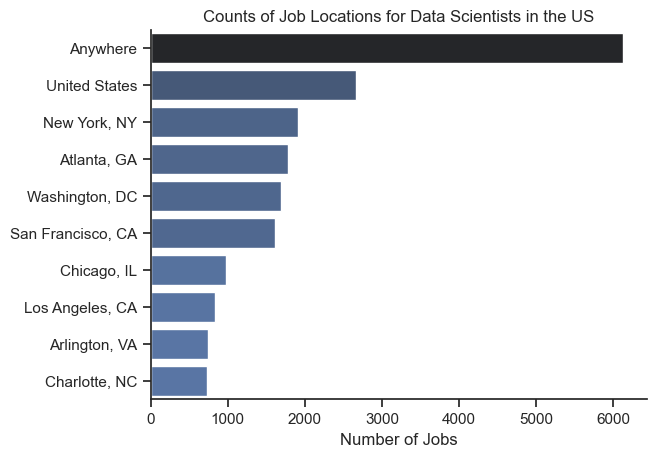

In [15]:
df_DS_plot = df_DS_US['job_location'].value_counts().head(10).to_frame()


sns.set_theme(style='ticks')
sns.barplot(data=df_DS_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine() #removes the border around the graph
plt.title('Counts of Job Locations for Data Scientists in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

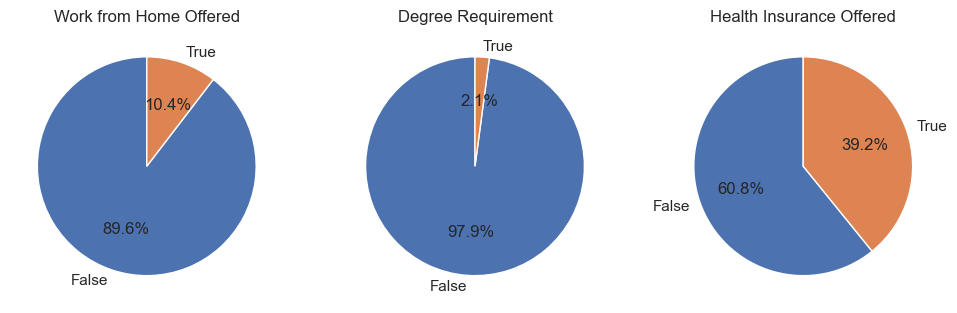

In [20]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12, 5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DS_US[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

plt.show()

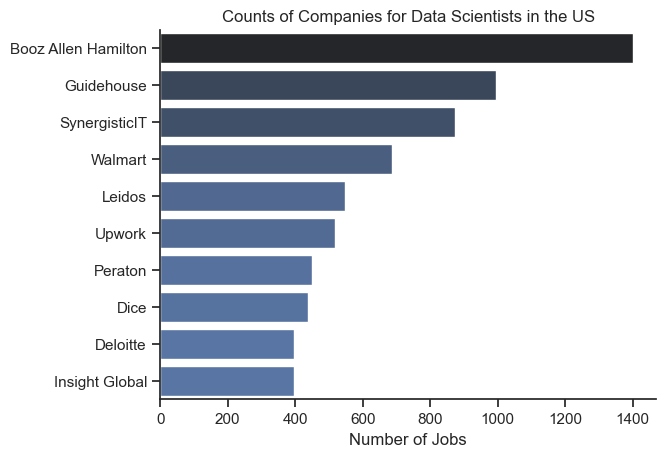

In [23]:
df_DS_plot = df_DS_US['company_name'].value_counts().head(10).to_frame()


sns.set_theme(style='ticks')
sns.barplot(data=df_DS_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine() #removes the border around the graph
plt.title('Counts of Companies for Data Scientists in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()